# TensorFlow 2 

## This Notebook is a short introduction uses Keras to:

1. Load a prebuilt dataset.(mnist dataset)
2. Build a neural network machine learning model that classifies images.
3. Train this neural network.
3. Evaluate the accuracy of the model.

In [42]:
import tensorflow as tf
tf.__version__

'2.15.0'

## Load a dataset

In [43]:
mnist = tf.keras.datasets.mnist

(x_train , y_train ), (x_test , y_test) = mnist.load_data()

## Build a machine learning model

- Build a tf.keras.Sequential model:



In [45]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Flatten(input_shape=(28,28)) , 
    tf.keras.layers.Dense(128 , activation='relu') , 
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10 , activation='sigmoid')

])

[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.


For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [46]:
prediction = model(x_train[:1]).numpy()
prediction

array([[9.3778789e-01, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 2.1875119e-01, 6.3809892e-26,
        0.0000000e+00, 6.4823966e-24]], dtype=float32)

The [`tf.nn.softmax`](https://www.tensorflow.org/api_docs/python/tf/nn/softmax) function converts these logits to _probabilities_ for each class:

In [47]:
sft = tf.nn.softmax(prediction).numpy()
sft

array([[0.12527184, 0.13331279, 0.13331279, 0.13331279, 0.13331279,
        0.13331279, 0.06103512, 0.04904304, 0.04904304, 0.04904304]],
      dtype=float32)

Define a loss function for training using [`losses.SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy)

In [48]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

 - The loss function **takes a vector of ground truth values** and a
   **vector of logits** and **returns a scalar loss for each example**.
 - This loss is equal to the negative log probability of the true class:
   The loss is zero if the model is sure of the correct class.
 - This untrained model gives probabilities close to random (1/10 for
   each class), so the initial loss should be close to 
   `-tf.math.log(1/10) ~= 2.3`.


In [49]:
loss_fn(y_train[10] , prediction).numpy()

2.015057

Before you start training, configure and compile the model using Keras [`Model.compile`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile). Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [50]:
model.compile(optimizer='adam' , loss=loss_fn , metrics=['accuracy'])

## Train and evaluate your model

Use the [`Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method to adjust your model parameters and minimize the loss:

In [51]:
model.fit(x_train , y_train , epochs=5)

Epoch 1/5


C:\Users\soulo\anaconda3\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 4s 2ms/step - loss: 2.3448 - accuracy: 0.7579
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5573 - accuracy: 0.8536
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4733 - accuracy: 0.8748
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4144 - accuracy: 0.8916
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3842 - accuracy: 0.8984


The [`Model.evaluate`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [53]:
model.evaluate(x_test , y_test , verbose=True)

313/313 [==============================] - 1s 1ms/step - loss: 0.3320 - accuracy: 0.9229


[0.3320261836051941, 0.9229000210762024]

#### If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [55]:
probab_model = tf.keras.Sequential([

    model,
    tf.keras.layers.Softmax()
])

probab_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.11444619, 0.11444619, 0.11444619, 0.11444619, 0.11444619,
        0.11444619, 0.04231913, 0.11444619, 0.04211137, 0.11444619],
       [0.11447123, 0.11447275, 0.11447275, 0.11447275, 0.04211218,
        0.11447264, 0.11447265, 0.11447263, 0.11446822, 0.04211218],
       [0.03932006, 0.10688299, 0.10688299, 0.10688244, 0.10688299,
        0.10688299, 0.10563872, 0.10688299, 0.10688299, 0.10686079],
       [0.10688938, 0.03935924, 0.10688938, 0.10688938, 0.10688938,
        0.10688938, 0.10688938, 0.10688938, 0.10552565, 0.10688938],
       [0.06410449, 0.06390139, 0.10140007, 0.06409285, 0.17370051,
        0.08185884, 0.06397131, 0.16934533, 0.0639592 , 0.15366594]],
      dtype=float32)>

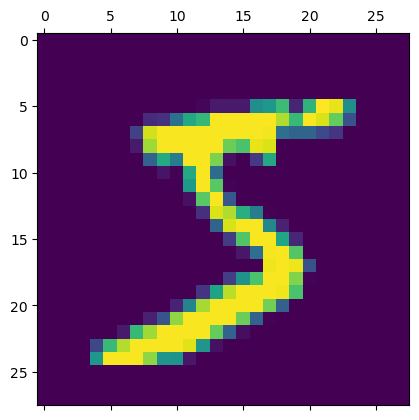

In [56]:
import matplotlib.pyplot as plt

plt.matshow(x_train[0])

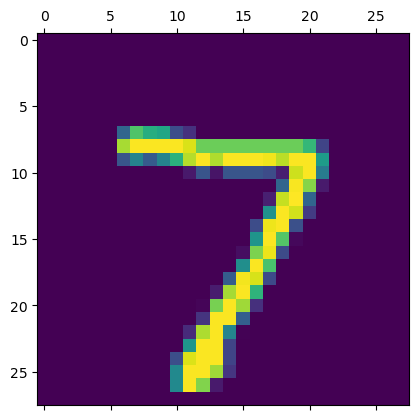

In [60]:
plt.matshow(x_test[0])